In [1]:
import sys
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
import community as community_lv

In [2]:
import sys
sys.path.append("../")
from algorithms.louvain import Louvain

# Data Preparation

In [3]:
def read_data(data_path="../data/emails.txt", labels_path="../data/emails_labels.txt"):
    with open(labels_path, "r") as f:
        nodes_labels = f.read()

    nodes_labels = nodes_labels.strip("\n").split("\n")
    nodes = [int(x.split()[0]) for x in nodes_labels]
    labels = [int(x.split()[1]) for x in nodes_labels]

    with open(data_path, "r") as f:
        edges_data = f.read()

    edges = {x: dict() for x in nodes}
    edges = [(int(x.split()[0]), int(x.split()[1])) for x in edges_data.strip("\n").split("\n")]

    return edges, nodes, labels

In [4]:
edges, nodes, labels = read_data()
edges[:10], nodes[:10], labels[:10]

([(0, 1),
  (2, 3),
  (2, 4),
  (5, 6),
  (5, 7),
  (8, 9),
  (10, 11),
  (12, 13),
  (12, 14),
  (15, 16)],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 1, 21, 21, 21, 25, 25, 14, 14, 14])

# Testing own Louvain

In [5]:
def get_n_m(x):
    n = int(x ** 0.5)
    while x % n != 0:
        n -= 1
    return tuple(sorted((n, x // n)))

In [6]:
def visualize(edges, nodes, labels, communities, x):
    np.random.seed = 30
    cmap = plt.cm.get_cmap('hsv', 42)
    node_labels = np.array(labels)
    norm = plt.Normalize(vmin=node_labels.min(), vmax=node_labels.max())
    color_map = cmap(norm(node_labels))

    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)

    pos = {}
    n = np.ceil(x ** 0.5)
    print(n)

    for node, community in enumerate(communities):
        x = (community % n) * 10  + np.random.random() * 7
        y = (community // n) * 10 + np.random.random() * 7
        pos[node] = [x, y]

    nx.draw(G, pos=pos, with_labels=False, node_size=3, width=0.01, node_color=color_map)
    plt.show();

In [7]:
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
modularity_score = community_lv.modularity({i: labels[i] for i in range(1005)}, G)
print("Modularity score: ", modularity_score)

Modularity score:  0.3137611028706121


7.0


C:\Users\MichaelKuzmyn\AppData\Local\Temp\ipykernel_5636\1187922494.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', 42)


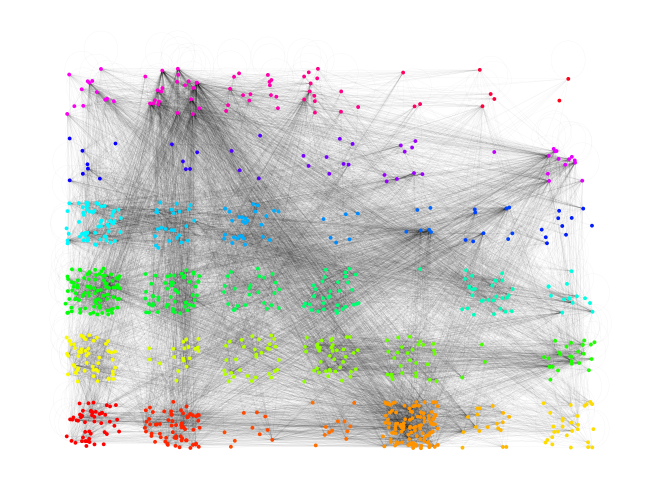

In [8]:
visualize(edges, nodes, labels, labels, 42)

In [9]:
def create_graph(edges, nodes):
    edge_dct = {x: [] for x in nodes}

    for u, v in edges:
        edge_dct[u].append(v)

    return edge_dct

In [10]:
edge_dct = create_graph(edges, nodes)
edge_dct[8]

[9,
 566,
 672,
 510,
 358,
 8,
 573,
 44,
 569,
 12,
 570,
 498,
 499,
 504,
 441,
 7,
 525,
 11,
 141,
 856,
 86,
 466,
 823,
 661,
 160,
 950,
 213,
 301]

In [11]:
l = Louvain(edge_dct)

communities = l.louvain()

In [12]:
len(communities[0])

54

In [13]:
def create_graph_from_communities(communities):
    nodes = [x for x in range(1005)]
    labels = [None] * 1005

    for c in communities:
        for u in communities[c]:
            labels[u] = c

    return nodes, labels

In [14]:
nodes_loivain, labels_louvain = create_graph_from_communities(communities[0])
nodes_loivain[:10], labels_louvain[:10]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [11, 11, 424, 424, 424, 424, 424, 406, 406, 406])

In [15]:
nmi_score_louvain = normalized_mutual_info_score(labels_louvain, labels)
f"{nmi_score_louvain=}"

'nmi_score_louvain=0.530286478276967'

In [16]:
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
modularity_score = community_lv.modularity({i: labels_louvain[i] for i in range(1005)}, G)
print("Modularity score: ", modularity_score)

Modularity score:  0.42329276199203053


8.0


C:\Users\MichaelKuzmyn\AppData\Local\Temp\ipykernel_5636\1187922494.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', 42)


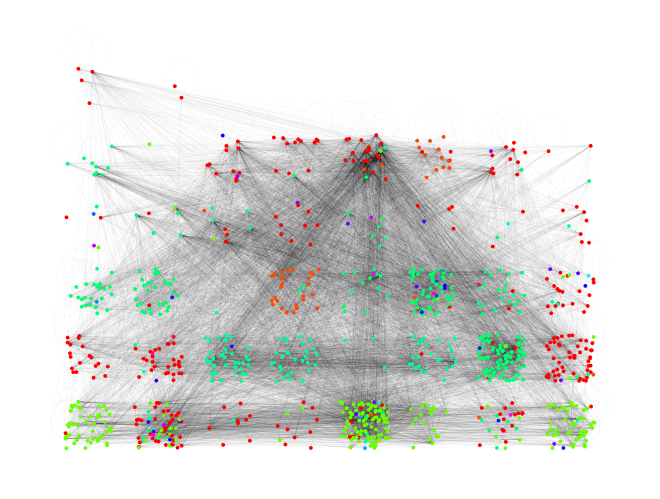

In [17]:
visualize(edges, nodes_loivain, labels_louvain, labels, len(communities[0]))

# Testing Built-in Louvain 

In [18]:
def nx_louvain(edges, nodes, labels):
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    comms = nx.community.louvain_communities(G)

    x = len(comms)
    communities = [None] * 1005
    for idx, c in enumerate(comms):
        for n in c:
            communities[n] = idx

    nmi_score_louvain = normalized_mutual_info_score(communities, labels)
    print(f"number of communities: {x}")
    print(f"nx.louvain {nmi_score_louvain=}")

    partition = {i: communities[i] for i in range(1005)}
    modularity_score = community_lv.modularity(partition, G)

    print("Modularity score: ", modularity_score)


    np.random.seed = 30
    cmap = plt.cm.get_cmap('hsv', 42)
    node_labels = np.array(labels)
    norm = plt.Normalize(vmin=node_labels.min(), vmax=node_labels.max())
    color_map = cmap(norm(node_labels))

    pos = {}
    n = np.ceil(x ** 0.5)

    for node, community in enumerate(communities):
        x = (community % n) * 10  + np.random.random() * 7
        y = (community // n) * 10 + np.random.random() * 7
        pos[node] = [x, y]

    nx.draw(G, pos=pos, with_labels=False, node_size=3, width=0.01, node_color=color_map)
    plt.show();

In [19]:
def py_louvain(edges, nodes, labels):
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)

    communities = [val for val in community_lv.best_partition(G).values()]
    x = len(set(communities))

    nmi_score_louvain = normalized_mutual_info_score(communities, labels)
    print(f"number of communities: {x}")
    print(f"python louvain {nmi_score_louvain=}")

    partition = community_lv.best_partition(G)
    modularity_score = community_lv.modularity(partition, G)

    print("Modularity score: ", modularity_score)

    np.random.seed = 30
    cmap = plt.cm.get_cmap('hsv', 42)
    node_labels = np.array(labels)
    norm = plt.Normalize(vmin=node_labels.min(), vmax=node_labels.max())
    color_map = cmap(norm(node_labels))

    pos = {}
    n = np.ceil(x ** 0.5)

    for node, community in enumerate(communities):
        x = (community % n) * 10  + np.random.random() * 7
        y = (community // n) * 10 + np.random.random() * 7
        pos[node] = [x, y]

    nx.draw(G, pos=pos, with_labels=False, node_size=3, width=0.01, node_color=color_map)
    plt.show();

number of communities: 28
nx.louvain nmi_score_louvain=0.601646848026243
Modularity score:  0.43064924482041395


C:\Users\MichaelKuzmyn\AppData\Local\Temp\ipykernel_5636\920230499.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', 42)


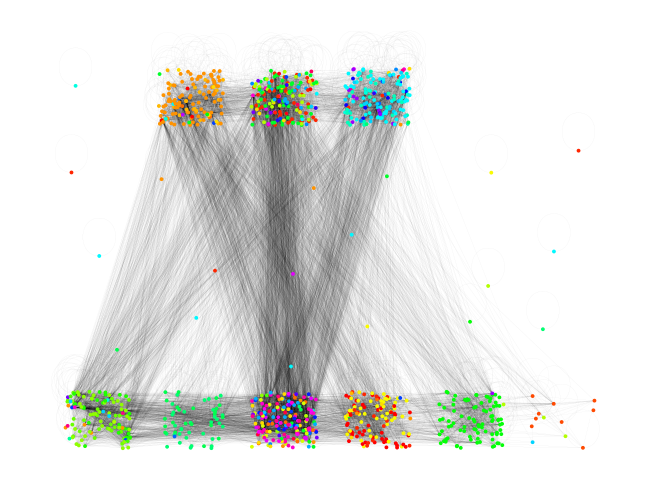

In [20]:
nx_louvain(edges, nodes, labels)

number of communities: 28
python louvain nmi_score_louvain=0.5825102425004104
Modularity score:  0.43186992262250096


C:\Users\MichaelKuzmyn\AppData\Local\Temp\ipykernel_5636\1440580786.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', 42)


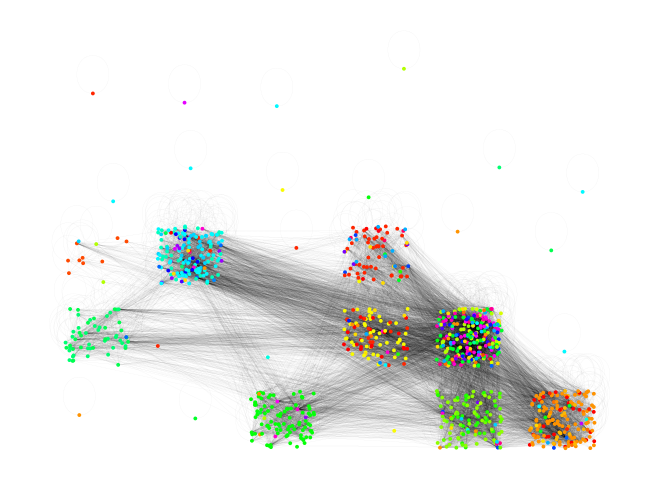

In [21]:
py_louvain(edges, nodes, labels)